In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Problem - I
Of the three movie genres, consider only the first one as the original genre.
- Between 2010 and 2016, which were the most common and least common movie genres, respectively?

In [2]:
movies_df = pd.read_csv('movie_data.csv')

In [43]:
movies_df.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')

In [10]:
release_year_filter_mask = (movies_df['title_year'] >= 2010) & (movies_df['title_year'] <= 2016)

movies_2k10_16_df = movies_df[release_year_filter_mask]

In [15]:
movies_2k10_16_df

0        Comedy
1     Animation
2     Biography
3         Drama
4         Drama
        ...    
95        Drama
96        Drama
97       Action
98    Adventure
99       Comedy
Name: genre_1, Length: 100, dtype: object

In [32]:
movies_genre_grouped_df = movies_2k10_16_df.groupby(['genre_1'])['Title'].count()

<Axes: xlabel='genre_1', ylabel='Title'>

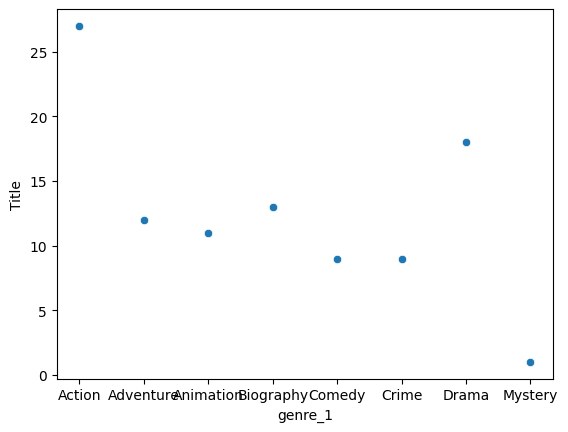

In [33]:
sns.scatterplot(data=movies_genre_grouped_df)

In [36]:
movie_pivoted = pd.pivot_table(data=movies_df, index=['title_year'],  columns=['genre_1'], values='IMDb_rating', aggfunc=len)

In [37]:
movie_pivoted

genre_1,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Mystery
title_year,,,,,,,,
2010,4.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0
2011,3.0,1.0,NaN,1.0,3.0,2.0,1.0,NaN
2012,4.0,2.0,1.0,NaN,1.0,1.0,4.0,NaN
2013,4.0,2.0,NaN,5.0,1.0,1.0,4.0,NaN
2014,6.0,2.0,3.0,2.0,1.0,2.0,4.0,NaN
2015,3.0,2.0,2.0,2.0,NaN,1.0,2.0,NaN
2016,3.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN


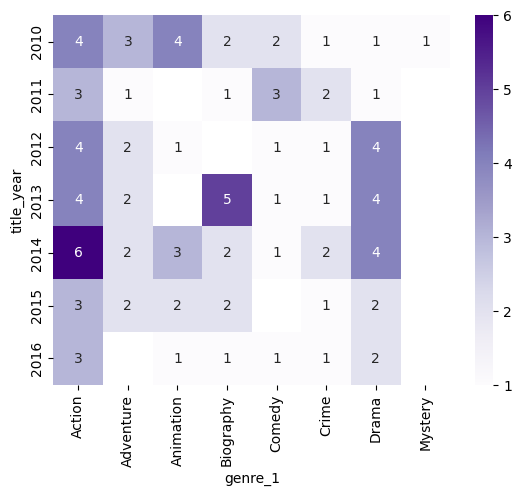

In [41]:
ax = sns.heatmap(data=movie_pivoted, cmap="Purples",annot=True)

# Problem - II
Of the three movie genres, consider only the first one as the original genre of a movie. Which was the most popular genre in 2013?

# Problem - III
You want to see how a movie’s budget impacts the gross amount of money earned from sales. What is the relationship between these two factors?

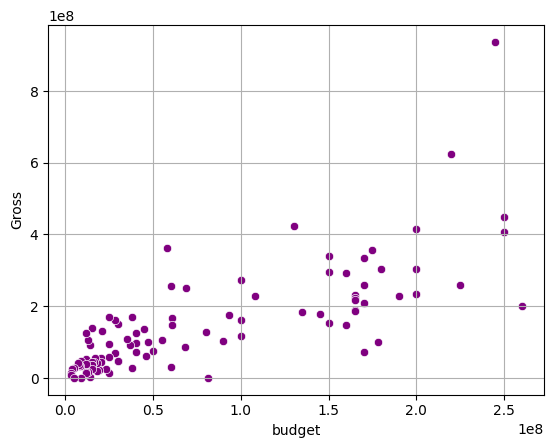

In [49]:
ax = sns.scatterplot(data=movies_df, x=movies_df['budget'], y=movies_df['Gross'], color="purple")
ax.grid()